In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE

# Day 1

In [79]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [81]:
df.shape

(400, 9)

In [82]:
df['Research'] = df['Research'].astype(object)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    object 
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB


In [84]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


### The column serial no of the student, which is reduntant for further analysis thus, we drop the column

In [85]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [86]:
df = df.drop('Serial No.',axis=1)

In [87]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [88]:
df.skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit      0.201765
dtype: float64

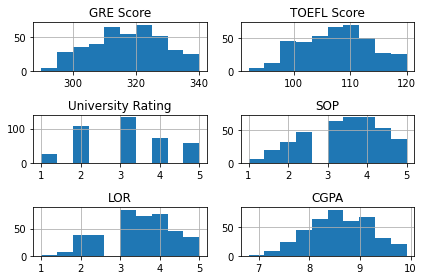

In [89]:
df.drop('Chance of Admit',axis=1).hist()
plt.tight_layout()

<AxesSubplot:xlabel='Research', ylabel='count'>

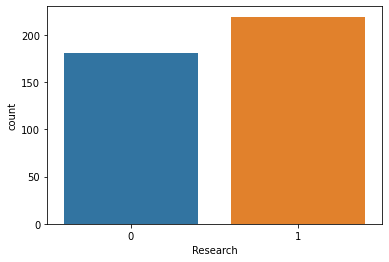

In [90]:
## checking the distribution of the categorical independent variable.
sns.countplot(df['Research'])

<AxesSubplot:xlabel='Chance of Admit', ylabel='count'>

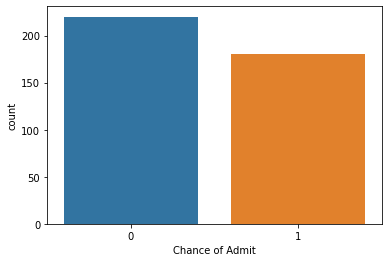

In [91]:
## distribution of dependent variable.
sns.countplot(df['Chance of Admit'])

In [92]:
df['Chance of Admit'].value_counts(normalize=True)*100

0    55.0
1    45.0
Name: Chance of Admit, dtype: float64

In [93]:
## The plot shows there is no imbalance in the target variable.

In [94]:
## lets check for the missing values.
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [95]:
## there are no null values in the dataset.

In [96]:
## Lets dummy encode the categorical variable.
df = pd.get_dummies(data=df, drop_first=True)

In [97]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_1
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,0,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## splitting the dataset.

In [98]:
## lets split the dataset into train and test:

X = df.drop('Chance of Admit',axis=1)
Xc = sm.add_constant(X)
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.2, random_state=10)

## scaling the dataset.

In [99]:
## lets scale the data ( dont scale the dummys*****)
ss = StandardScaler()

X_train.iloc[:,1:7] = ss.fit_transform(X_train.iloc[:,1:7])

X_test.iloc[:,1:7] = ss.transform(X_test.iloc[:,1:7])

In [100]:
X_train.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
303,1.0,0.587727,-0.029126,-0.055711,0.137448,0.079080,-0.058748,1
349,1.0,-0.283787,-1.027731,-0.055711,-0.850942,-0.471041,-0.907216,0
149,1.0,-0.458089,-0.195560,-0.947079,0.137448,-0.471041,-0.541210,1
100,1.0,0.500576,-0.029126,-0.055711,0.137448,0.079080,-0.208478,1
175,1.0,0.326273,0.636611,0.835658,1.125838,0.079080,0.473624,1


In [101]:
X_test.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
332,1.0,-0.719543,-0.195560,-0.055711,0.137448,-1.021161,-0.624393,1
111,1.0,0.413424,0.303742,0.835658,0.631643,0.629200,0.157528,1
352,1.0,-1.155300,-1.194166,-0.947079,-0.356747,0.079080,-0.873943,1
205,1.0,-1.852511,-1.360600,-0.947079,-0.850942,-0.471041,-1.556045,0
56,1.0,-0.022333,-0.861297,-0.055711,-1.345137,-0.471041,-1.971960,0


## building logreg full model.

In [102]:
## Logistic Regression (Full model):

logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.6486
Time:                        09:32:32   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8427      0.325     -2.593      0.010      -1.479      -0.206
GRE Scor

## Interpretation.

In [103]:
## puesdo r-squared value - mcfadden's r-squared value::


## p-value is lesser than 0.05, Thus the model is significant.

## AIC (Akaike information criterion).

In [104]:
## lets calculate the AIC ( Akaike Information criterion) value.
## it is the relative measure of model evaluation.
## it gives a trade-off bw model accuracy and model complexcity.

In [105]:
print('AIC: ',logreg.aic)

AIC:  170.44859325107456


In [106]:
## we can use the aic value to compare the models created on the same datset.

## Odds

In [107]:
## finding the odds for each variable.

df_odds = pd.DataFrame(np.exp(logreg.params), columns=['odds'])
df_odds

,odds
const,0.430565
GRE Score,1.840944
TOEFL Score,1.217940
University Rating,1.782060
SOP,1.194659
LOR,1.679287
CGPA,14.176716
Research_1,1.789418


## predicting on the test data.

In [108]:
y_test_pred = logreg.predict(X_test)
y_test_pred.head()

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
dtype: float64

In [109]:
## since the target variable can take only two values either 0 or 1.
## we decide the cut-off value to be i.e 0.5.
## if y-test-pred value greater than 0.5 then 1, esle 0.

In [110]:
y_pred = [0 if x<0.5 else 1  for x in y_test_pred]
y_pred[:5]

[0, 1, 0, 0, 0]

## confusion matrix.

In [111]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  9],
       [ 5, 33]], dtype=int64)

In [112]:
## True positive: actual '1' values which are classified correctly.
TP = cm[1,1]

## True negative: actual '0' values which are classified correctly.
TN = cm[0,0]

## False positive: actual '0' values which are classified wrongly as '1'.
FP = cm[0,1]

## False negative: acutal '1' values which are classified wrongly as '0'
FN = cm[1,0]

## computing various performance metrics.

In [113]:
## Precision: it is ratio of true positives to the total positive predictions.
precision = TP / (TP+FP)
precision

0.7857142857142857

In [114]:
## Recall: It is the ratio of true positives to the total actual positive observations.
## it is also know as *******Sensitivity or True positive Rate.*******
recall = TP / (TP+FN)
recall

0.868421052631579

In [115]:
## Specificity: it is the ratio of true neagtives to the total negative observations.
specificity = TN / (TN+FP)
specificity

0.7857142857142857

In [116]:
## f1-score: It is defined as the harmonic mean of precision and recall.
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.825

In [117]:
## Accuracy: it is the ratio of correct predictions (TN+TP) to the total observations.
## According to the confusion matrix, it is the sum of diagonal elements to the sum of all in the matrix.
## it is not very good measure if the dataset is imbalanced.
accuracy = (TN+TP) / (TN+TP+FN+FP)
accuracy

0.825

#### Interpretation: For our dataset, both the accuracy and f1-score are equal. we can say that our model is 82.5% accurate.

In [118]:
## classification report.
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



### Interpretation:
- from the above output, we can infer that the recall of the positive class is known as sensitivity and the recall of negative class is specificty.

#### **Kappa score**: It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

In [119]:
kappa = cohen_kappa_score(y_test,y_pred)
print('kappa-score:',kappa)

kappa-score: 0.6508728179551122


#### Interpretation: As the kappa score for the full model (with cutoff probability 0.5) is 0.6509, we can say that there is substantial agreement b/w the actual and predicted values.

## Plot the ROC curve:
- ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of separability of the model.

In [120]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

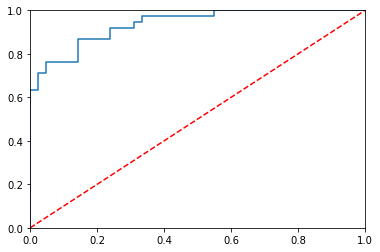

In [121]:
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0,1],[0,1],'r--')

In [122]:
metrics.roc_auc_score(y_test,y_test_pred)

0.93671679197995

## Identify the Best Cut-off Value.
- The performance measures that we obtained above, are for the cut_off = 0.5. Now, let us consider a list of values as cut-off and calculate the different performance measures.

#### Creating generalized function to create a dataframe containing the scores of the models.

In [123]:
score_card = pd.DataFrame(columns=['Probability Cutoff','AUC Score','Precision score','Recall score','Accuracy score','kappa score','f1-score'])

def update_score_card(model, cutoff):
    
    y_test_pred = logreg.predict(X_test)
    y_pred = [0 if x<cutoff else 1 for x in y_test_pred]
    
    global score_card
    
    score_card = score_card.append({'Probability Cutoff':cutoff,
                                   'AUC Score':metrics.roc_auc_score(y_test,y_pred),
                                   'Precision score':metrics.precision_score(y_test,y_pred),
                                   'Recall score':metrics.recall_score(y_test,y_pred),
                                   'Accuracy score':metrics.accuracy_score(y_test,y_pred),
                                   'kappa score':metrics.cohen_kappa_score(y_test,y_pred),
                                   'f1-score':metrics.f1_score(y_test,y_pred)},
                                    ignore_index=True)    

In [124]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for value in cutoff:
    update_score_card(logreg, value)

In [125]:
score_card
score_card.style.highlight_max(color='lightgreen',subset=['AUC Score','Accuracy score','kappa score','f1-score'])

,Probability Cutoff,AUC Score,Precision score,Recall score,Accuracy score,kappa score,f1-score
0,0.100000,0.760652,0.660714,0.973684,0.750000,0.509804,0.787234
1,0.200000,0.807018,0.720000,0.947368,0.800000,0.604938,0.818182
2,0.300000,0.829574,0.760870,0.921053,0.825000,0.652605,0.833333
3,0.400000,0.828321,0.772727,0.894737,0.825000,0.651741,0.829268
4,0.500000,0.827068,0.785714,0.868421,0.825000,0.650873,0.825000
5,0.600000,0.862782,0.846154,0.868421,0.862500,0.724656,0.857143
6,0.700000,0.823308,0.833333,0.789474,0.825000,0.648241,0.810811
7,0.800000,0.822055,0.852941,0.763158,0.825000,0.647355,0.805556
8,0.900000,0.803885,0.960000,0.631579,0.812500,0.617834,0.761905


#### Interpretation: The above dataframe shows that, the model cutt_off probability 0.6, returns the highest Auc score, f1-score, kappa score and accuracy.


#### In the above method, we passed a list of values, for the cutoff, but this method is not efficient as one can pass different values and obtain a cutoff based on the passed values.

### To obtain the optimal cut-off value we use the following methods.
1. Younden's index.
2. Cost-based Method.

### 1. Younden's Index.
- Younden's index is the classification cut-off probability for which the (Sensitivity + Specificity -1 ) is maximized.
- Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR)

In [126]:
youndens_table = pd.DataFrame({'TPR':tpr,
                               'FPR':fpr,
                               'Thresholds':thresholds})

youndens_table['Difference'] = youndens_table.TPR - youndens_table.FPR

youndens_table = youndens_table.sort_values('Difference',ascending=False).reset_index(drop=True)

youndens_table.head()

,TPR,FPR,Thresholds,Difference
0,0.868421,0.142857,0.618555,0.725564
1,0.763158,0.047619,0.841912,0.715539
2,0.710526,0.023810,0.860956,0.686717
3,0.921053,0.238095,0.380299,0.682957
4,0.710526,0.047619,0.858806,0.662907


#### As we can see that maximum cut-off probability is approximately 0.62, let us consider this as cut-off to predict the target values.

In [127]:
y_test_pred_younden = [0 if x<0.62 else 1 for x in y_test_pred]
y_test_pred_younden[:5]

[0, 1, 0, 0, 0]

In [128]:
### Confusion matrix:
cm = confusion_matrix(y_test, y_test_pred_younden)
cm

array([[36,  6],
       [ 6, 32]], dtype=int64)

In [129]:
### classification report:
acc_table = classification_report(y_test,y_test_pred_younden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.84      0.84      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



#### Interpretation: From the above output, we can see that the model with 0.62 cut-off, is 85% accurate. The specificity and the sensitivity are nearly balanced.

In [130]:
### kappa-score:
kappa = cohen_kappa_score(y_test, y_test_pred_younden)
print('kappa-score: ',kappa)

kappa-score:  0.6992481203007519


#### Interpretation: As the Kappa score for the full model(with cut-off probability 0.62) is 0.6992, we can say that there is substantial agrrement bw the actual and predicted values.

## 2. Cost-based Method.
- In this method, we find the optimal value of the cut-off for which the total cost is minimum. The total cost is given by the formula:

- total_cost = FN x C_1 + FP x C_2

In [131]:
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):
    
    cm = confusion_matrix(actual_value, predicted_value)
    
    return cm[1,0] * cost_FN + cm[0,1] * cost_FP

df_total_cost = pd.DataFrame(columns=['cut-off','total_cost'])
i=0

for cut_off in range(10,100):
    total_cost = calculate_total_cost(y_test, y_test_pred.map(lambda x: 1 if x>(cut_off/100) else 0), 3.5, 2)
    df_total_cost.loc[i] = [(cut_off/100), total_cost]
    
    i+=1

In [132]:
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
46,0.56,29.5
47,0.57,29.5
48,0.58,29.5
49,0.59,29.5
50,0.60,29.5
51,0.61,29.5
26,0.36,30.5
27,0.37,30.5
28,0.38,30.5
25,0.35,30.5


#### from the above output we can see that, the total_cost is same for the cut-off probability values 0.56, 0.57, 0.58. 0.59, 0.60, 0.61. Thus, we can consider any of these values as the cut-off probability.

#### Here we considering the cut-off value as 0.58. i.e, if y_test_pred is less than 0.58, then consider it to be 0 else consider as 1.

In [133]:
y_test_pred_cost = [0 if x<0.58 else 1 for x in y_test_pred]
y_test_pred_cost[:5]

[0, 1, 0, 0, 0]

In [134]:
## Confusion matrix:
cm = confusion_matrix(y_test,y_test_pred_cost)
cm

array([[36,  6],
       [ 5, 33]], dtype=int64)

In [135]:
## Classification report:
acc_table = classification_report(y_test,y_test_pred_cost)
print(acc_table)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.85      0.87      0.86        38

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



#### Interpretation: From the above output, we can see that the model with cut-off = 0.58 ids 86% accurate.

In [136]:
## kappa score:
kappa = cohen_kappa_score(y_test,y_test_pred_cost)
print('kappa-score: ',kappa)

kappa-score:  0.7246558197747184


#### Interpretation: As the kappa score for the full model (with cut-off probability 0.58) is 0.7247, we can say that there is substantial agreement between the actual and predicted values.

## Recursive feature Elimination (RFE):

In [137]:
logreg = LogisticRegression()

rfe_model = RFE(estimator=logreg, n_features_to_select=3)

rfe_model = rfe_model.fit(X_train,y_train)

In [138]:
rank = pd.DataFrame(rfe_model.ranking_,index=X_train.columns,columns=['Rank'])
rank.sort_values('Rank')

,Rank
GRE Score,1
University Rating,1
CGPA,1
LOR,2
Research_1,3
TOEFL Score,4
SOP,5
const,6


In [139]:
rank[rank['Rank']==1].index

Index(['GRE Score', 'University Rating', 'CGPA'], dtype='object')

In [140]:
## fitting the model using the selected features:
logreg_rfe = sm.Logit(y_train, X_train[['const','GRE Score', 'University Rating', 'CGPA']]).fit()

print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.251732
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.6335
Time:                        09:32:34   Log-Likelihood:                -80.554
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 4.590e-60
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5459      0.208     -2.627      0.009      -0.953      -0.139
GRE Scor

In [141]:
## AIC
print('AIC:',logreg_rfe.aic)

AIC: 169.10857896399273


In [142]:
## predicting the values on test set
y_test_pred_rfe = logreg_rfe.predict(X_test[['const','GRE Score', 'University Rating', 'CGPA']])
y_test_pred_rfe.head()

332    0.046820
111    0.727388
352    0.007586
205    0.000586
56     0.001808
dtype: float64

#### Since the target variable can take only two values either 0 or 1. We consider the cut-off value 0.6. i.e. if 'y_pred_prob_rfe' is less than 0.6, then consider it to be 0 else consider it to be 1

In [143]:
y_pred_rfe = [0 if x<0.6 else 1 for x in y_test_pred_rfe]
y_pred_rfe[:5]

[0, 1, 0, 0, 0]

In [144]:
## Confusion matrix:
cm = confusion_matrix(y_test,y_pred_rfe)
cm

array([[36,  6],
       [ 7, 31]], dtype=int64)

In [145]:
## Classification report:
result = classification_report(y_test, y_pred_rfe)
print(result)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.84      0.82      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



#### Interpretation: From the above output, we can see that the model with cut-off = 0.6 is 84% accurate.

In [146]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_rfe)
print('kappa value:',kappa)

kappa value: 0.6737766624843162


#### Interpretation: As the kappa score for the full model (with cut-off probability 0.6) is 0.6738, we can say that there is substantial agreement between the actual and predicted values.

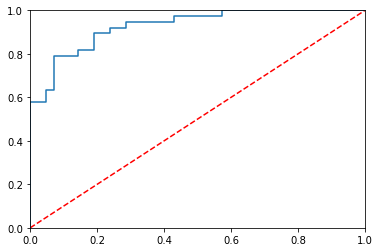

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rfe)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.plot(fpr,tpr)

In [148]:
metrics.roc_auc_score(y_test,y_test_pred_rfe)

0.9273182957393484

# Day 2

In [213]:
X = df.drop('Chance of Admit',axis=1)
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [214]:
ss = StandardScaler()

X_train.iloc[:,1:6] = ss.fit_transform(X_train.iloc[:,1:6])

X_test.iloc[:,1:6] = ss.transform(X_test.iloc[:,1:6])

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## Decision Tree for Classification

- Decision tree is a non parametric supervised learning method.
- It builds model in the form of a tree structure.
- It breaks down a dataset into smaller and smaller subsets. (called splitting.)
- **A decision node is a node on which a decision of split to be made**.
- A node that can not be split further is known as the **terminal/leaf node**.
- A **leaf node represents the decision**.
- A decision tree can work with both numerical and categorical variables.

### A decision tree for classification is built using critirea like the Gini index and entropy.

## Entropy.
- Entropy is one of the critirea used to build the decision tree.
- It calculates the heteroginity of the sample.
- The **entropy is zero** if the sample is **completely homogeneous.**
- and **it is equal to 1**, if the sample is **equally divided.**
- Entropy of the variable 'X' is calculated as:
<p style='text-indent:28em'> <strong> $ E(X) =  -\sum_{i = 1}^{c}p_{i}log_{2}p_{i} $</strong> </p>
- And the conditional emtropy of the variable is given as:
<p style='text-indent:28em'> <strong> $ E(T, X) = \sum_{c \epsilon X}P(c)E(c) $</strong> </p>


##### Build a full decision tree model on a train dataset using 'entropy'.

In [150]:
d_tree_classification = DecisionTreeClassifier(criterion='entropy',random_state=10)

decision_tree = d_tree_classification.fit(X_train,y_train)

##### To visualize our decision tree we will use Graphviz. If you are an anaconda user then install it by using conda install graphviz otherwise write the command pip install graphviz.

In [180]:
from sklearn import tree

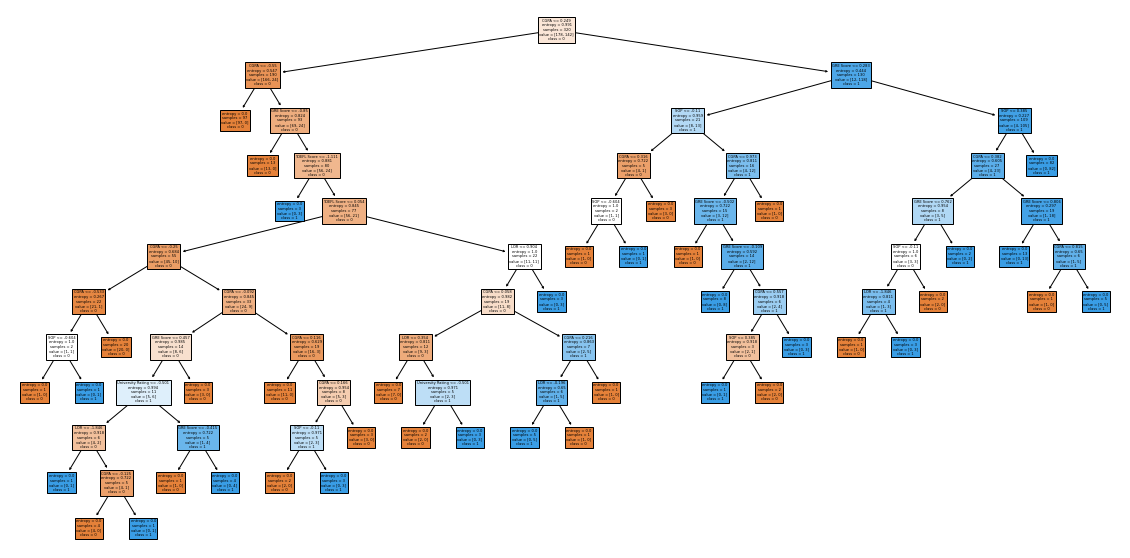

In [188]:
plt.figure(figsize=[20,10])
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=['0','1'],filled=True)
plt.show()

In [160]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

result_train = classification_report(y_train,y_train_pred)
result_test = classification_report(y_test,y_test_pred)

print('train-report: ','\n',result_train)
print('\n')
print('test-report: ','\n',result_test)

train-report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



test-report:  
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.86      0.84      0.85        38

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80



##### Interpretation: From the above Output, we can see that there is a difference b/w the train and test accuracy, thus we can conclude that the decision tree is over-fitted on the train data.

### If we tune the Hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

# Tune the Hyperparameters using GridsearchCV (Decision Tree).

In [171]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2, 10),
                    'max_features':['sqrt','log2'],
                    'min_samples_split':range(2,10),
                    'min_samples_leaf':range(1,10),
                    'max_leaf_nodes':range(1,10)}]

d_tree_classification = DecisionTreeClassifier(random_state=100)


tree_grid = GridSearchCV(estimator=d_tree_classification,
                        param_grid= tuned_parameters,
                        cv = 5)

tree_grid_model = tree_grid.fit(X_train,y_train)

In [172]:
tree_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [173]:
## Build the model using tuned hyperparameters:
final_tree = DecisionTreeClassifier(criterion='gini',
                                   max_depth=4,
                                   max_features='sqrt',
                                   max_leaf_nodes=8,
                                   min_samples_leaf=2,
                                   min_samples_split=8)

final_tree_model = final_tree.fit(X_train,y_train)

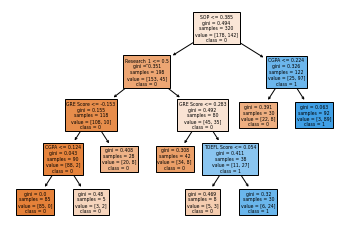

In [190]:
tree.plot_tree(final_tree_model,feature_names=X_train.columns, class_names=['0','1'],filled=True)
plt.show()

In [174]:
y_train_pred = final_tree.predict(X_train)
y_test_pred = final_tree.predict(X_test)

result_train = classification_report(y_train,y_train_pred)
result_test = classification_report(y_test,y_test_pred)

print('train-report: ','\n',result_train)
print('\n')
print('test-report: ','\n',result_test)

train-report:  
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       178
           1       0.93      0.80      0.86       142

    accuracy                           0.88       320
   macro avg       0.89      0.87      0.88       320
weighted avg       0.89      0.88      0.88       320



test-report:  
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.94      0.87      0.90        38

    accuracy                           0.91        80
   macro avg       0.92      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



**Interpretation:** The `accuracy` of the test dataset increased from 0.86 to 0.91 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

# Gini Index.

##### Build a decision tree using 'criterion = gini', 'max_depth = 5', 'min_samples_split = 4', 'max_leaf_nodes = 6'.

In [176]:
d_tree = DecisionTreeClassifier(criterion='gini',
                               max_depth=5,
                               min_samples_split=4,
                               max_leaf_nodes=6,
                               random_state=10)

d_tree_model = d_tree.fit(X_train,y_train)

In [177]:
y_train_pred = d_tree_model.predict(X_train)
y_test_pred = d_tree_model.predict(X_test)

In [178]:
train_report = classification_report(y_train,y_train_pred)
test_report = classification_report(y_test,y_test_pred)

print('train_report: ','\n',train_report)
print('test_report: ','\n',test_report)

train_report:  
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       178
           1       0.94      0.85      0.89       142

    accuracy                           0.91       320
   macro avg       0.91      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320

test_report:  
               precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



##### Interpretation: From the above result, we can see that there is slight significant difference b/w the train and test accuracy, thus, we can conclude that the decision tree is less over-fitted after specifying some of the hyperparameters. 

# Random Forest for Classification.
- It is the **method of constructing multiple decision trees on randomly selected data samples**
-  We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees.
- This method is used for both regression and classification analysis. 
- The random forest returns the prediction based on all the individual decision trees prediction.
- **For regression,** it returns the **average of all the predicted values.**
- and **for classification,** it returns the class, which is the **mode of all the predicted classes.**

- It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
RF_classification = RandomForestClassifier(n_estimators=10, random_state=10)

RF_model = RF_classification.fit(X_train, y_train)

In [195]:
## calculating the performance measures:
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

print('train-report:','\n',classification_report(y_train, y_train_pred))
print('test-report:','\n',classification_report(y_test, y_test_pred))

train-report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       178
           1       1.00      0.99      0.99       142

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

test-report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.84      0.82      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



## Tune the Hyperparameters using GridSearchCV (Random Forest)

In [198]:
tuned_parameters = [{'criterion':['entropy','gini'],
                    'n_estimators':[10,30,50,70,90],
                    'max_depth':[10,15,20],
                    'max_features':['sqrt','log'],
                    'min_samples_split':[2,5,8,11],
                     'min_samples_leaf':[1,5,9],
                     'max_leaf_nodes':[2,5,8,11]}]


random_forest = RandomForestClassifier(random_state=10)

random_f_grid = GridSearchCV(estimator=random_forest,
                             param_grid=tuned_parameters,
                             cv = 5)

random_f_grid_model = random_f_grid.fit(X_train,y_train)

In [200]:
random_f_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

#### Build the model using tuned hyperparameters:

In [202]:
final_RF = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 max_depth=10,
                                 max_features='sqrt',
                                 max_leaf_nodes=2,
                                 min_samples_leaf=1,
                                 min_samples_split=2,
                                 random_state=10)

final_RF_model = final_RF.fit(X_train,y_train)

In [203]:
## calculating the performance measures:
y_train_pred = final_RF_model.predict(X_train)
y_test_pred = final_RF_model.predict(X_test)

print('train-report:','\n',classification_report(y_train, y_train_pred))
print('test-report:','\n',classification_report(y_test, y_test_pred))

train-report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       178
           1       0.90      0.87      0.88       142

    accuracy                           0.90       320
   macro avg       0.90      0.89      0.90       320
weighted avg       0.90      0.90      0.90       320

test-report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        42
           1       0.85      0.92      0.89        38

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



##### Interpretation: The accuracy of the test data increased from 0.84 to 0.89 after tuning the hyperparameters. Also, the sensitivity and specificity of the model is balanced.

# Identify the Importatnt features.
- The method `feature_importances_` returns the value corresponding to each feature.
- which is **defined as the ratio of total decrease in `Gini impurity` across every tree in the forest where the feature is used to the total count of trees in the forest.** This is also caled as, `Gini Importance`.

In [206]:
important_features = pd.DataFrame({'features':X_train.columns,
                                  'Importance':final_RF_model.feature_importances_})

important_features = important_features.sort_values('Importance',ascending=False).reset_index(drop=True)
important_features

,features,Importance
0,CGPA,0.3
1,TOEFL Score,0.2
2,Research_1,0.2
3,GRE Score,0.1
4,SOP,0.1
5,LOR,0.1
6,const,0.0
7,University Rating,0.0


<AxesSubplot:xlabel='Importance', ylabel='features'>

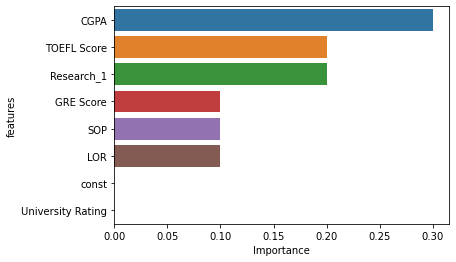

In [207]:
sns.barplot(x='Importance',y='features',data=important_features)

## For above day2 concepts, Decision tree and random forest i have used X_train and X_test where for X i added added a constant (which i used for logistic reg), dont use that constant added data for X_train and test in Day2 concepts******************************************************************************************************************************